## **Haripranay responsibilities**
# Data Acquisition and Exploratory Data Analysis (EDA)


In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


First 10 rows of the dataset:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  

C:\Users\harip\AppData\Local\Temp\ipykernel_6856\1215079720.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


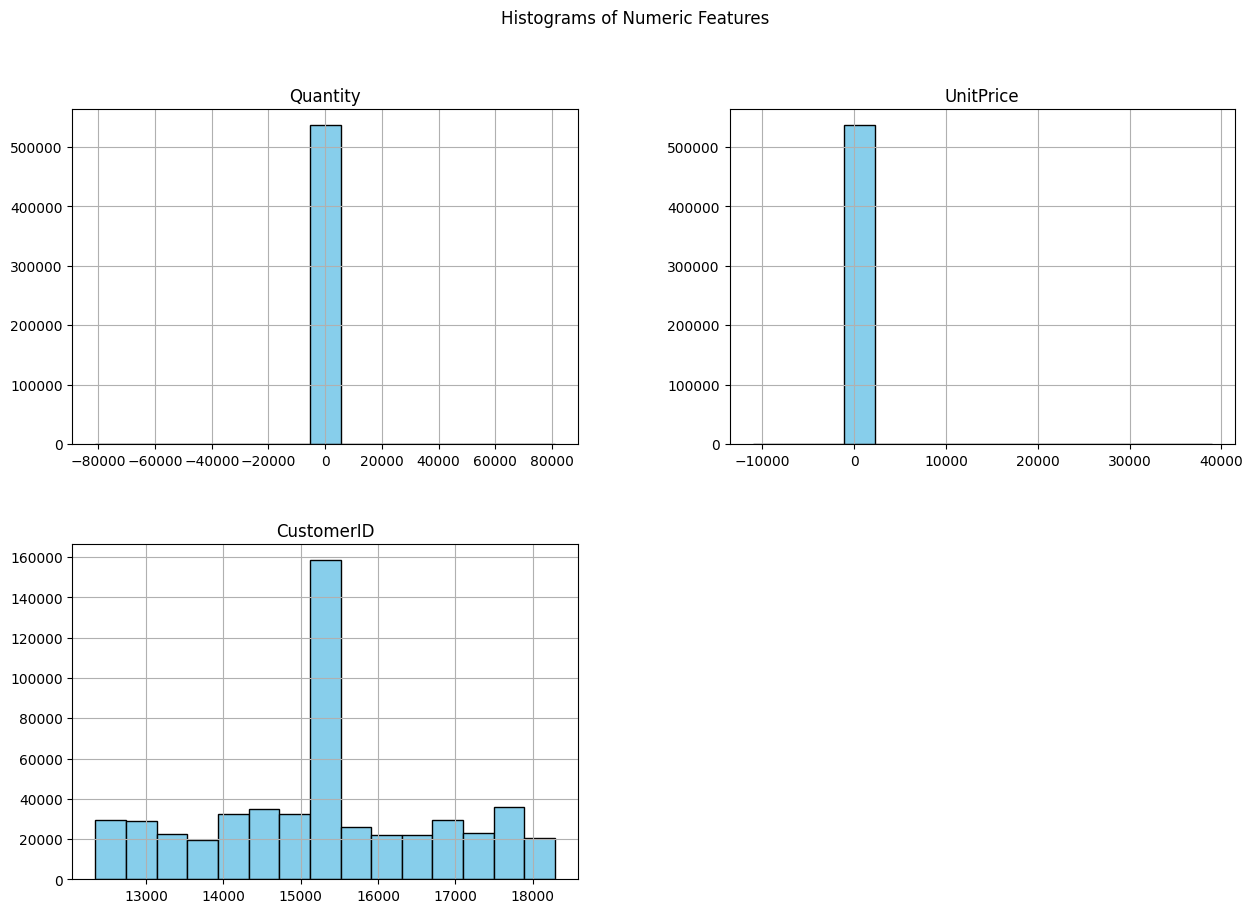

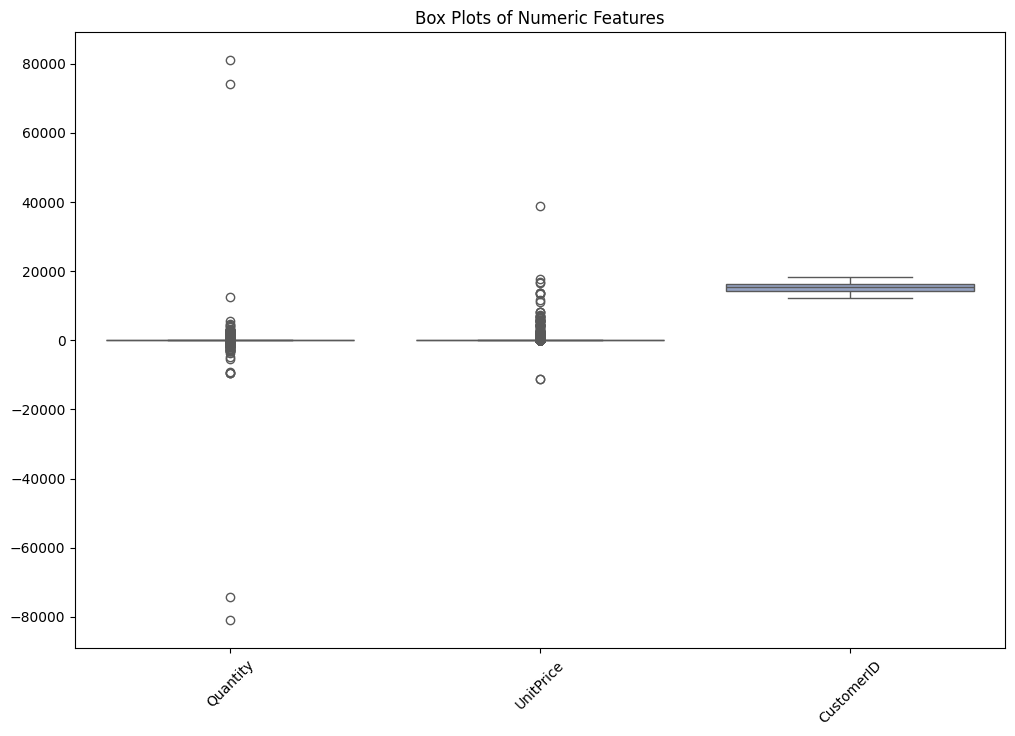

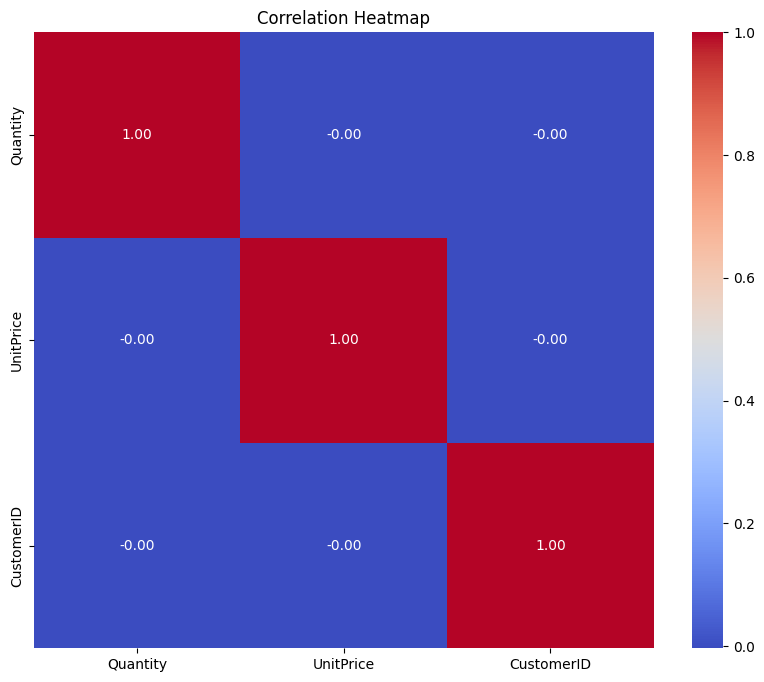

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data.csv', encoding='ISO-8859-1')  # Replace with your actual file path and encoding if necessary

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:\n", data.head(10))

# 1. Data Cleaning

def remove_duplicates(data):
    """Remove duplicate rows in the dataset."""
    initial_shape = data.shape
    data = data.drop_duplicates()
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")
    return data

def handle_missing_values(data, strategy='mean'):
    """Handle missing values in the dataset.

    Args:
    strategy: 'mean', 'median', 'mode', or 'drop'. Default is 'mean'.

    Returns:
    DataFrame with missing values handled.
    """
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            if strategy == 'mean' and pd.api.types.is_numeric_dtype(data[column]):
                data[column].fillna(data[column].mean(), inplace=True)
            elif strategy == 'median' and pd.api.types.is_numeric_dtype(data[column]):
                data[column].fillna(data[column].median(), inplace=True)
            elif strategy == 'mode':
                data[column].fillna(data[column].mode()[0], inplace=True)
            elif strategy == 'drop':
                data.dropna(inplace=True)
    print("Handled missing values using strategy:", strategy)
    return data

def correct_errors(data):
    """Example function to correct known errors. Customize based on dataset specifics."""
    # Add custom data correction code here if needed
    print("Correcting known data entry errors, if any.")
    return data

# Clean data
data = remove_duplicates(data)
data = handle_missing_values(data, strategy='mean')
data = correct_errors(data)

# Display the first 10 rows of the cleaned dataset
print("\nFirst 10 rows of the cleaned dataset:\n", data.head(10))

# 2. Exploratory Data Analysis (EDA)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", data.describe())

# Data Visualization
def plot_histograms(data):
    """Plot histograms for each numeric feature in the dataset."""
    data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
    plt.suptitle('Histograms of Numeric Features')
    plt.show()

def plot_scatter(data, x_col, y_col):
    """Plot scatter plot for two specific columns."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, color='blue')
    plt.title(f'Scatter Plot of {x_col} vs {y_col}')
    plt.show()

def plot_boxplots(data):
    """Plot boxplots for each numeric feature to identify outliers."""
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, palette="Set2")
    plt.title("Box Plots of Numeric Features")
    plt.xticks(rotation=45)
    plt.show()

def plot_correlation_heatmap(data):
    """Plot a heatmap of the correlation matrix, using only numeric columns."""
    numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Run visualizations
plot_histograms(data)
plot_boxplots(data)

# Adjust x_col and y_col for scatter plots as needed
# Example: plot_scatter(data, 'column_x', 'column_y')

plot_correlation_heatmap(data)


In [8]:
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1482.754716
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15281.160818
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366643 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      366643 non-null  object        
 1   StockCode      366643 non-null  object        
 2   Description    366643 non-null  object        
 3   Quantity       366643 non-null  int64         
 4   InvoiceDate    366643 non-null  datetime64[ns]
 5   UnitPrice      366643 non-null  float64       
 6   CustomerID     366643 non-null  float64       
 7   Country        366643 non-null  object        
 8   TotalPrice     366643 non-null  float64       
 9   InvoiceHour    366643 non-null  int32         
 10  DayOfWeek      366643 non-null  int32         
 11  StockCodeFreq  366643 non-null  int64         
 12  CustomerFreq   366643 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(3), object(4)
memory usage: 36.4+ MB


In [16]:
data.shape

(366643, 13)

## **Saiteja Neela Responsibilities**
# **Classification Tasks**


Class distribution before filtering:
 Country
36    2449
13      53
14      52
10      50
31      19
24      13
33      11
25       7
0        6
12       6
19       5
3        4
34       4
37       4
7        4
17       2
16       2
27       2
6        2
1        2
32       2
9        2
2        1
5        1
28       1
26       1
20       1
30       1
18       1
35       1
15       1
Name: count, dtype: int64
Logistic Regression model trained successfully.
Decision Tree model trained successfully.
Random Forest model trained successfully.


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Logistic Regression Cross-Validation Score: 0.875
Logistic Regression Performance Metrics:
  - Accuracy: 0.871
  - Precision: 0.842
  - Recall: 0.871
  - F1 Score: 0.853
  - ROC-AUC: N/A


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Decision Tree Cross-Validation Score: 0.881
Decision Tree Performance Metrics:
  - Accuracy: 0.876
  - Precision: 0.831
  - Recall: 0.876
  - F1 Score: 0.853
  - ROC-AUC: N/A


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Random Forest Cross-Validation Score: 0.901
Random Forest Performance Metrics:
  - Accuracy: 0.904
  - Precision: 0.823
  - Recall: 0.904
  - F1 Score: 0.862
  - ROC-AUC: N/A


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.9064814814814814

Classification Report for the Best Model (Random Forest):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         4
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          36       

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harip\AppData\Local\Temp\ipykernel_6856\2035403842.py:142: FutureWa

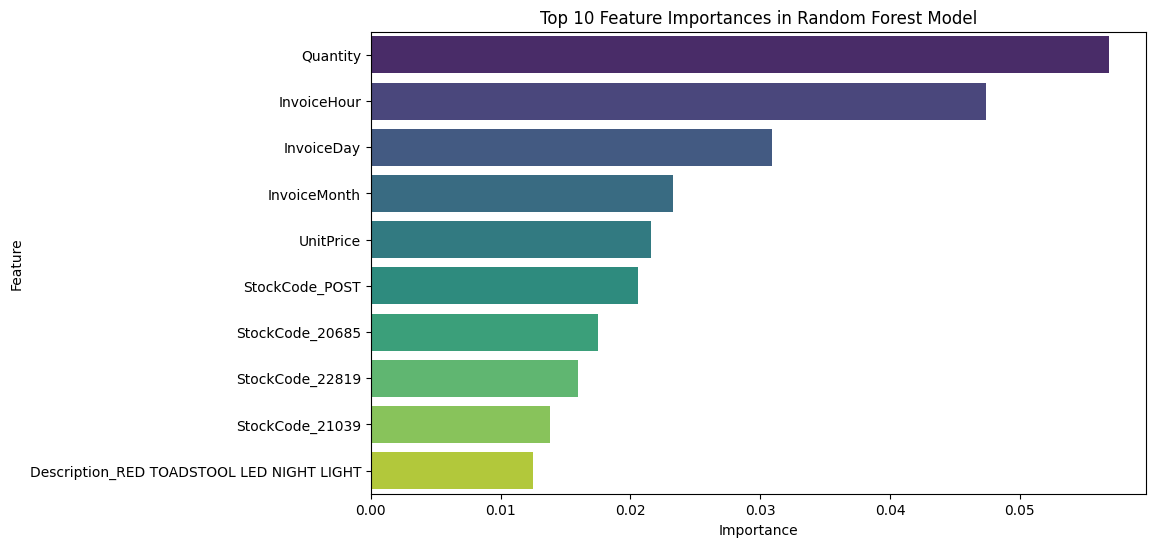

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Drop rows with missing 'Country' values and convert InvoiceDate to datetime
data = data.dropna(subset=['Country'])
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Extract additional time-based features from 'InvoiceDate'
data['InvoiceDay'] = data['InvoiceDate'].dt.day
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceHour'] = data['InvoiceDate'].dt.hour

# Optimize data types for numeric columns
data['Quantity'] = data['Quantity'].astype('int32')
data['UnitPrice'] = data['UnitPrice'].astype('float32')
data['CustomerID'] = data['CustomerID'].astype('float32')

# Encode categorical variables
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])

# Apply one-hot encoding on 'StockCode' and 'Description'
data_sampled = data.sample(frac=0.005, random_state=42)
data_sampled = pd.get_dummies(data_sampled, columns=['StockCode', 'Description'], drop_first=True)

# Prepare features (X) and target variable (y)
X = data_sampled.drop(columns=['Country', 'InvoiceNo', 'InvoiceDate', 'CustomerID'])
y = data_sampled['Country']

# Check class distribution
class_counts = y.value_counts()
print("Class distribution before filtering:\n", class_counts)

# Remove classes with fewer than 2 instances
min_samples = 2
valid_classes = class_counts[class_counts >= min_samples].index
data_filtered = data_sampled[data_sampled['Country'].isin(valid_classes)]
X_filtered = data_filtered.drop(columns=['Country', 'InvoiceNo', 'InvoiceDate', 'CustomerID'])
y_filtered = data_filtered['Country']

# Update feature matrix and target variable
X = X_filtered
y = y_filtered

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models with initial parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} model trained successfully.")

# Performance evaluation with cross-validation and metrics
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"\n{model_name} Cross-Validation Score: {cv_scores.mean():.3f}")

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Calculate ROC-AUC score only if y_pred_proba matches number of classes in y_test
    if y_pred_proba is not None and y_pred_proba.shape[1] == len(set(y)):
        try:
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        except ValueError:
            roc_auc = 'N/A'
    else:
        roc_auc = 'N/A'

    print(f"{model_name} Performance Metrics:")
    print(f"  - Accuracy: {accuracy:.3f}")
    print(f"  - Precision: {precision:.3f}")
    print(f"  - Recall: {recall:.3f}")
    print(f"  - F1 Score: {f1:.3f}")
    print(f"  - ROC-AUC: {roc_auc}")

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("\nBest parameters for Random Forest:", grid_search.best_params_)
print("Best cross-validation score for Random Forest:", grid_search.best_score_)

# Best Random Forest model evaluation
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("\nClassification Report for the Best Model (Random Forest):\n", classification_report(y_test, y_pred_best))

# Feature importance visualization
feature_importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Random Forest:")
print(importance_df.head(10))  # Display top 10 features for brevity

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances in Random Forest Model")
plt.show()


## **Jnp Responsibilities**
# **Regression Tasks**

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,36,1,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,36,1,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,36,1,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,36,1,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,36,1,12,8


Root Mean Squared Error: 4.933295402608972
R-squared: 0.706136189352068


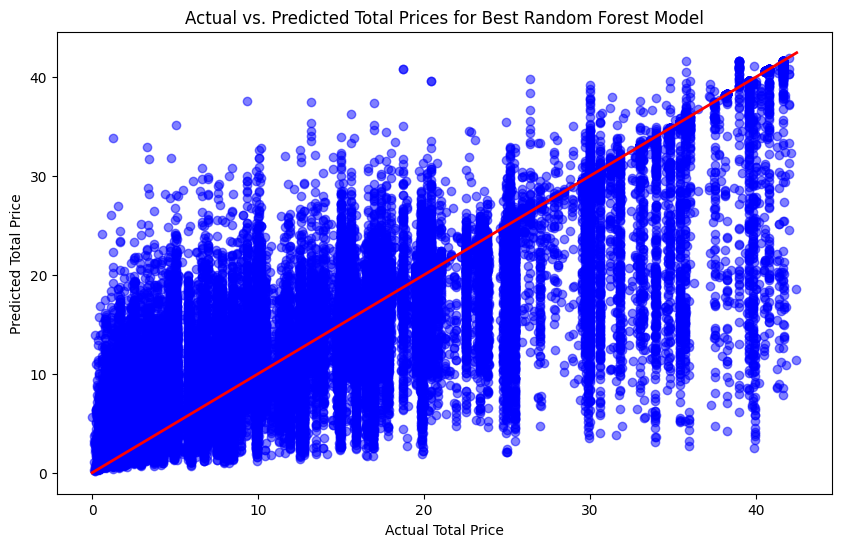

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Convert InvoiceDate to datetime if it's not already
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Remove rows with missing values in important columns (e.g., UnitPrice, CustomerID)
data = data.dropna(subset=['UnitPrice', 'CustomerID', 'Quantity'])

# Remove negative UnitPrice and Quantity values
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Feature Engineering
# Calculate TotalPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Extract additional time-based features from InvoiceDate
data['InvoiceHour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6

# Frequency encoding for StockCode and CustomerID
data['StockCodeFreq'] = data.groupby('StockCode')['StockCode'].transform('count')
data['CustomerFreq'] = data.groupby('CustomerID')['CustomerID'].transform('count')

# Removing outliers in TotalPrice (optional, based on IQR)
Q1 = data['TotalPrice'].quantile(0.25)
Q3 = data['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['TotalPrice'] >= (Q1 - 1.5 * IQR)) & (data['TotalPrice'] <= (Q3 + 1.5 * IQR))]

# Selecting features and target
# Here, we use TotalPrice as the target, but you could also try UnitPrice
X = data[['Quantity', 'InvoiceHour', 'DayOfWeek', 'StockCodeFreq', 'CustomerFreq']]
y = data['TotalPrice']  # Predicting TotalPrice instead of UnitPrice for more stable results

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Plotting Actual vs Predicted Total Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Diagonal line
plt.xlabel("Actual Total Price")
plt.ylabel("Predicted Total Price")
plt.title("Actual vs. Predicted Total Prices for Best Random Forest Model")
plt.show()
